In [1]:
import pandas as pd
%pylab inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


Задача - провести такой же анализ, как представлено в примере, на своем датасете. 
В данном примере разобрана кластеризация вин по трем сортам на основании их химических характеристик

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


Разобьем данные на предикторы и отклик

In [3]:
data_new = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

In [4]:
X = data_new
y = df['y']

Выполним стандартизацию (у нас все данные являются вещественными числами):

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1. Главные компоненты:

Определим 2 главные компоненты и построим соответствующую визуализацию:

Proportion of variance explained:
Component #1: 0.23
Component #2: 0.16
Directions of principal components:
Component #1: [ 5.07857950e-04  4.25741350e-02 -2.23982178e-01  6.27085843e-02
 -2.33727303e-01  6.72062876e-01  6.61656891e-01]
Component #2: [-0.16504032 -0.0807775   0.58415861 -0.36158168  0.62443121  0.20533666
  0.24935238]


Text(0,0.5,'2nd component')

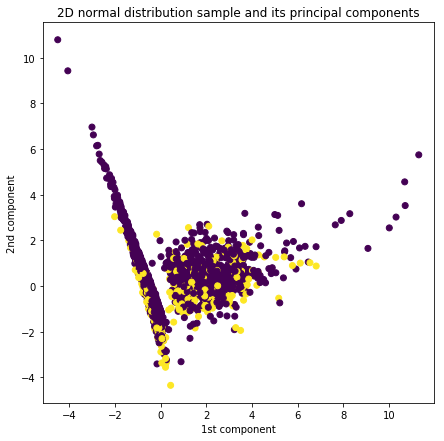

In [6]:
pca = PCA(2)
X_reduced = pca.fit_transform(X_scaled)

print('Proportion of variance explained:')
for i in range(len(pca.explained_variance_ratio_)):
    print('Component #%s: %.2f' % (i+1, pca.explained_variance_ratio_[i]))
    
print('Directions of principal components:')
for i in range(len(pca.components_)):
    print('Component #%s: %s' % (i+1, pca.components_[i]))
    
plt.figure(figsize=(7,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.xlabel('1st component')
plt.ylabel('2nd component')

### 2. Кластеризация по KMeans:

Выполним кластеризацию по двум найденным компонентам и визуально сравним результаты с реальными метками

Text(0,0.5,'2nd component')

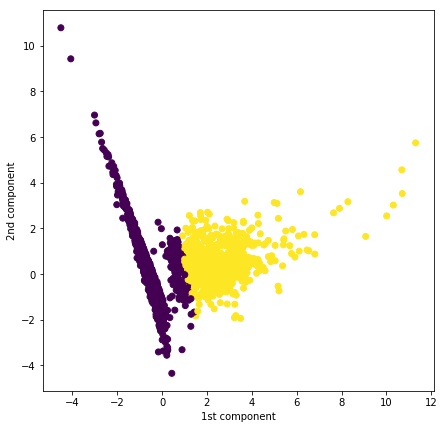

In [7]:
kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(X_reduced)

plt.figure(figsize=(7,7))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_)
plt.xlabel('1st component')
plt.ylabel('2nd component')

**Вывод: результат очень близок к реальным меткам**